Read in the two data sets, hour-resolution and minute-resolution, for the Station 'James Bay' (48.417N, 236.620E). For this exercise look only at data from 1 July 2018 and 1 July 2017, local time. (Note, time of minute-resolution data is in UTC, and time stamps of the hour-resolution data are local time. For July, local time = UTC - 7/24) Show your calculations step by step (i.e. do not use a "black box" confidence interval routine).

1. To show that you have picked the correct time intervals, plot the data for the two periods with minute and hour resolution data on the same axes.
2. From the hour resolution data set: Calculate the mean temperatures for each day (01/07/2018 and 01/07/2017) and determine with 95% confidence if Canada Day was warmer in 2018 than in 2017.
3. Repeat the calculation with the minute resolution data set: Again, determine if Canada Day was warmer in 2018 than in 2017 at the 95% confidence level. Briefly discuss the results.

In [1]:
import numpy as np
import scipy as sc
from datetime import datetime, timedelta
import pandas as pd

In [37]:
import sys

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib nbagg

### Gathering and Plotting the data for Canada Day 2017 and 2018

In [4]:
james_bay_min = np.loadtxt("Data/AllStations_temperature_minute_data_2019/JamesBay_temperature_2019.dat")

In [5]:
james_bay_min_time = np.linspace(james_bay_min[0], james_bay_min[1], int(james_bay_min[2]))
james_bay_min_temp = james_bay_min[3:]

In [6]:
#len(james_bay_min_temp) == james_bay_min[2] #Check to see if accurate

In [7]:
all_hour = np.loadtxt("Data/AllStations_temperature_hour_data_2019.dat")

In [8]:
#all_hour[0][16]  #To find column for james bay data in this table; checking to see if right Longitude

In [9]:
james_bay_hour_temp = np.zeros(len(all_hour) - 2)
james_bay_hour_time = np.zeros(len(all_hour) - 2)
for i in range(2, len(all_hour)):
    james_bay_hour_time[i-2] = all_hour[i][0]    
    james_bay_hour_temp[i-2] = all_hour[i][16]

In [10]:
epoch = datetime(1, 1, 1)
james_bay_min_time_pretty = [epoch + timedelta(days=x-367.0 - 7.0/24) for x in james_bay_min_time] #changing to Victoria time for July
james_bay_hour_time_pretty = [epoch + timedelta(days=y-367.0) for y in james_bay_hour_time]

In [11]:
#james_bay_hour_dict = {'Time':james_bay_hour_time_pretty, 'Temperature': james_bay_hour_temp}

#james_bay_hour_df = pd.DataFrame(james_bay_hour_dict)

#james_bay_min_dict = {'Time':james_bay_min_time_pretty, 'Temperature': james_bay_min_temp}

#james_bay_min_df = pd.DataFrame(james_bay_min_dict)

In [12]:
datetime.now() #(year, month, date, hour, minute, second, microsecond) -> in UTC

datetime.datetime(2019, 10, 4, 13, 35, 8, 115296)

In [13]:
hour_res_cd_17_time = []
hour_res_cd_17_temp = []
hour_res_cd_18_time = []
hour_res_cd_18_temp = []

for i in range(len(james_bay_hour_time)):
    time = james_bay_hour_time_pretty[i]
    test1 = time.year == 2017 and time.month == 7 and time.day == 1
    test2 = time.year == 2018 and time.month == 7 and time.day == 1
    test3 = time.year == 2018 and time.month == 7 and time.day == 2
    if test1:
        hour_res_cd_17_time.append(time)
        hour_res_cd_17_temp.append(james_bay_hour_temp[i])
    if test2:
        hour_res_cd_18_time.append(time)
        hour_res_cd_18_temp.append(james_bay_hour_temp[i])  
    if test3:
        print("Done")
        break

Done


In [14]:
min_res_cd_17_time = []
min_res_cd_17_temp = []
min_res_cd_18_time = []
min_res_cd_18_temp = []

for i in range(len(james_bay_min_time)):
    time = james_bay_min_time_pretty[i]
    test1 = time.year == 2017 and time.month == 7 and time.day == 1
    test2 = time.year == 2018 and time.month == 7 and time.day == 1
    test3 = time.year == 2018 and time.month == 7 and time.day == 2
    if test1:
        min_res_cd_17_time.append(time)
        min_res_cd_17_temp.append(james_bay_min_temp[i])
    if test2:
        min_res_cd_18_time.append(time)
        min_res_cd_18_temp.append(james_bay_min_temp[i])  
    if test3:
        print("Done")
        break

Done


In [15]:
hour_17_dict = {'Time':hour_res_cd_17_time, 'Temperature': hour_res_cd_17_temp}
hour_17_df = pd.DataFrame(hour_17_dict)
min_17_dict = {'Time':min_res_cd_17_time, 'Temperature': min_res_cd_17_temp}
min_17_df = pd.DataFrame(min_17_dict)
hour_18_dict = {'Time':hour_res_cd_18_time, 'Temperature': hour_res_cd_18_temp}
hour_18_df = pd.DataFrame(hour_18_dict)
min_18_dict = {'Time':min_res_cd_18_time, 'Temperature': min_res_cd_18_temp}
min_18_df = pd.DataFrame(min_18_dict)

In [16]:
min_17_df

,Time,Temperature
0,2017-07-01 00:00:00.297876,12.44
1,2017-07-01 00:01:00.297883,12.44
2,2017-07-01 00:02:00.297879,12.44
3,2017-07-01 00:03:00.297875,12.42
4,2017-07-01 00:04:00.297882,12.33
5,2017-07-01 00:05:00.297878,12.33
6,2017-07-01 00:06:00.297875,12.33
7,2017-07-01 00:07:00.297881,12.33
8,2017-07-01 00:08:00.297878,12.33
9,2017-07-01 00:09:00.297884,12.33


In [17]:
hour_17_df

,Time,Temperature
0,2017-07-01 00:00:00.000000,12.32
1,2017-07-01 01:00:02.879995,12.12
2,2017-07-01 01:59:57.120005,12.16
3,2017-07-01 03:00:00.000000,12.27
4,2017-07-01 04:00:02.879995,12.17
5,2017-07-01 04:59:57.120005,11.64
6,2017-07-01 06:00:00.000000,11.89
7,2017-07-01 07:00:02.879995,12.34
8,2017-07-01 07:59:57.120005,13.08
9,2017-07-01 09:00:00.000000,13.24


<IPython.core.display.Javascript object>


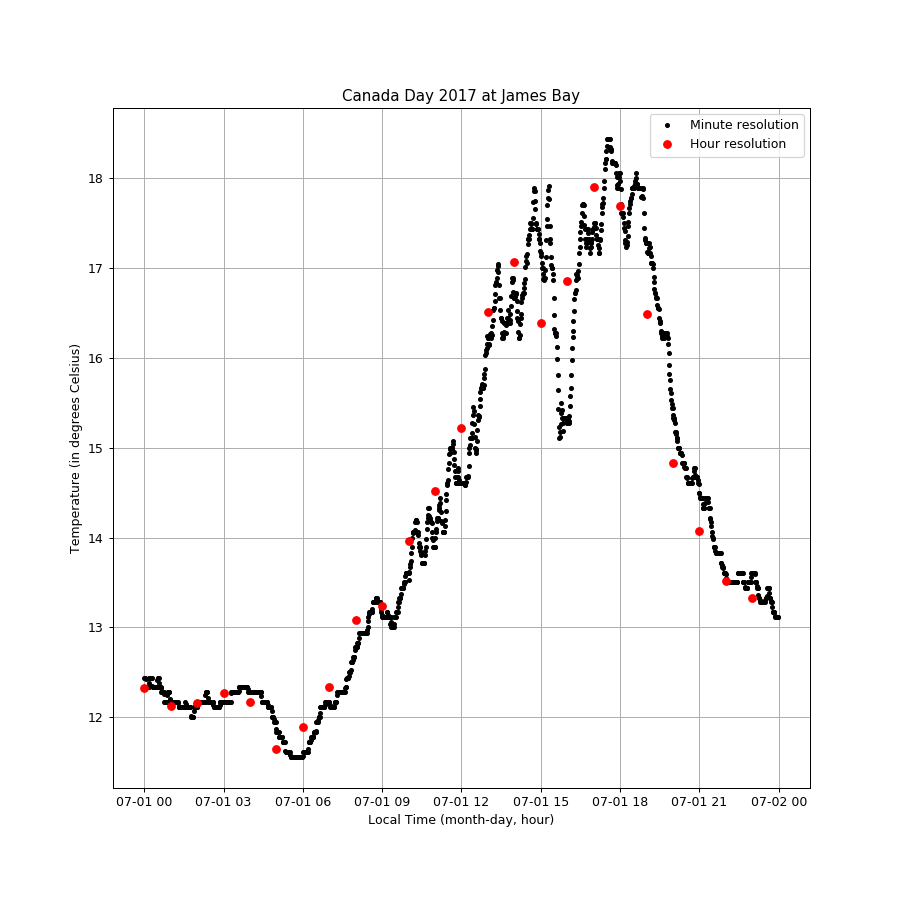

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [18]:
plt.figure(figsize=(10,10))
plt.plot(min_res_cd_17_time, min_res_cd_17_temp, 'k.', label="Minute resolution")
plt.plot(hour_res_cd_17_time, hour_res_cd_17_temp, 'ro', label="Hour resolution")
plt.title("Canada Day 2017 at James Bay")
plt.xlabel("Local Time (month-day, hour)")
plt.ylabel("Temperature (in degrees Celsius)")
plt.grid(True)
plt.legend()

In [19]:
plt.close()

<IPython.core.display.Javascript object>


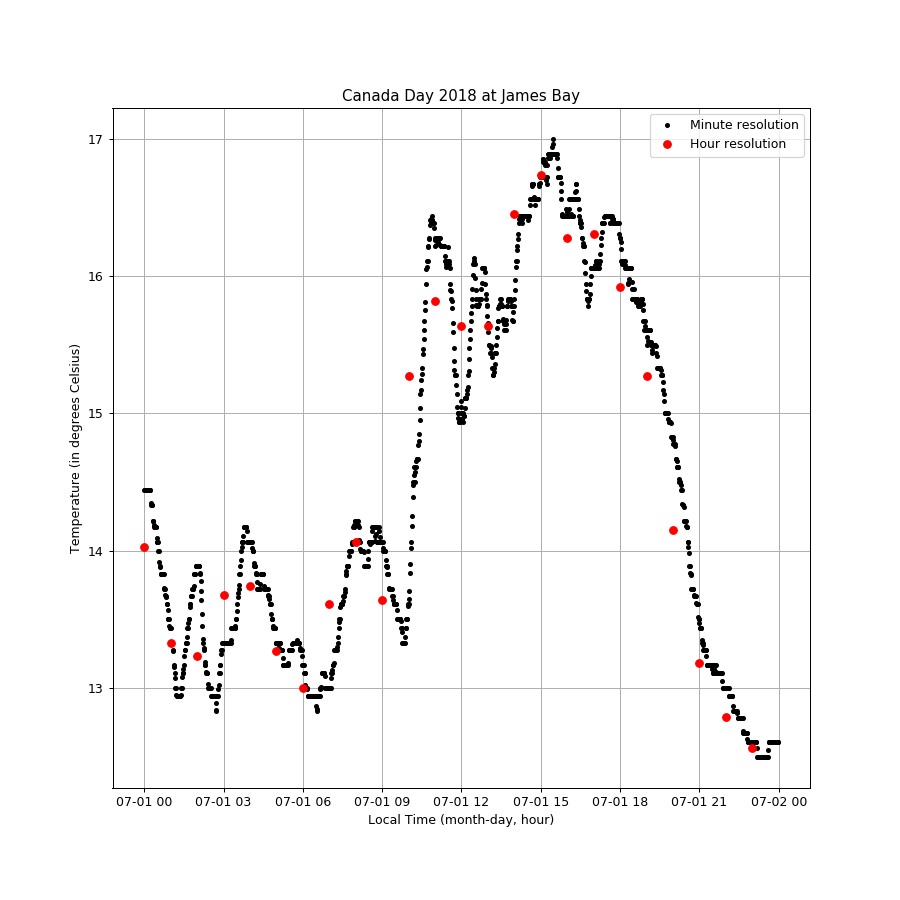

In [20]:
plt.figure(figsize=(10,10))
plt.plot(min_res_cd_18_time, min_res_cd_18_temp, 'k.', label="Minute resolution")
plt.plot(hour_res_cd_18_time, hour_res_cd_18_temp, 'ro', label="Hour resolution")
plt.title("Canada Day 2018 at James Bay")
plt.xlabel("Local Time (month-day, hour)")
plt.ylabel("Temperature (in degrees Celsius)")
plt.grid(True)
plt.legend()

In [21]:
plt.close()

### Modules made below to find confidence interval, assuming both sets of data are normally distributed. This is a good assumption for minute resolution data, as no. data points is well over 40... but it is an approximation for the hour resolution data.

In [31]:
def gaussian_curve(x, mu=0, sigma=1):
    '''
    Takes in x (or array of x) and returns Gaussian(x)
    Defaults to X ~ N(0, 1)
    But user is free to set X ~ N(mu, sigma), 
    where mu is population (or normally distributed sample) mean
    and sigma is population (or normally distributed sample) standard deviation
    
    Note: usually, y = frequency of occurence of x
    '''
    return (1/np.sqrt(2*np.pi))*(1/sigma)*np.e**(-1*((x-mu)**2)/(2*sigma**2))

In [32]:
def confidence_symm(percentage, distribution=gaussian_curve, this_sample_mean=0, this_sample_stdev=1, negative_infinity=-5, dx=1e-4):
    '''
    Returns confidence interval around given mean, for given distribution and
    standard deviation.
    
    this_sample_stdev = population* standard deviation/sqrt(sample_size)
    If not population... then of the larger sample (or set of samples) of which 
    this sample is a part of.
    
    Works only for symmetric unbounded distriubutions... like the normal distribution
    
    Obviously, one cannot perform integration from -infinity to infinity
    So user needs to specify "negative infinity".
    Since usually, we don't need more than 4 significant figures, have set
    default -infinity to -5, because
    gaussian_curve(-5) = 1.4867195147342987e-06
    '''
    alpha = 1.0 - percentage
    
    area = 0
    
    z = negative_infinity
    area += dx*distribution(z)
    
    while area < alpha/2:
        z += dx
        area += dx*distribution(z)
    
    z_alpha_by_2 = abs(z)
    
    upper = this_sample_mean + z_alpha_by_2*this_sample_stdev
    lower = this_sample_mean - z_alpha_by_2*this_sample_stdev
    
    return lower, upper 

### Hour resolution data:

In [39]:
print("Mean temperature on Canada Day 2017 = ", hour_17_df["Temperature"].mean(), "\u2070C")
print("Standard deviation of temperature on Canada Day 2017 = ", hour_17_df["Temperature"].std(), "\u2070C")
print()
print("Mean temperature on Canada Day 2018 = ", hour_18_df["Temperature"].mean(), "\u2070C")
print("Standard deviation of temperature on Canada Day 2018 = ", hour_18_df["Temperature"].std(), "\u2070C")

Mean temperature on Canada Day 2017 =  14.232916666666668 ⁰C
Standard deviation of temperature on Canada Day 2017 =  2.0510855644642483 ⁰C

Mean temperature on Canada Day 2018 =  14.48375 ⁰C
Standard deviation of temperature on Canada Day 2018 =  1.3399474762580936 ⁰C


Defining new random variable that is the difference in temperature between Canada Day 2018 and Canada Day 2017:

In [25]:
time_diff_hour = np.array(hour_res_cd_18_time) - np.array(hour_res_cd_17_time)

In [26]:
temp_diff_hour = np.array(hour_res_cd_18_temp) - np.array(hour_res_cd_17_temp)

In [28]:
hour_res_diff_dict = {'Time': time_diff_hour, 'Temperature': temp_diff_hour}
hour_res_diff_df = pd.DataFrame(hour_res_diff_dict)

In [35]:
avg_temp_diff_hour = hour_res_diff_df["Temperature"].mean()

In [33]:
interval = confidence_symm(0.95, this_sample_mean= avg_temp_diff_hour, this_sample_stdev= hour_res_diff_df["Temperature"].std()/np.sqrt(len(temp_diff_hour)))

In [43]:
print("Therefore, the average temperature difference (Canada Day 2018 - Canada Day 2017) is: ", avg_temp_diff_hour, "\u2070C")
print("And, with 95% confidnce, we can say that it falls between the temperature range\n", interval[0], "\u2070C < \"temperature difference\" < ", interval[1], "\u2070C")
print("So, I would interpret that Canada day 2018 does seem warmer than Canada day 2017..., \nbut cannot say that with 95% confidence")

Therefore, the average temperature difference (Canada Day 2018 - Canada Day 2017) is:  0.2508333333333332 ⁰C
And, with 95% confidnce, we can say that it falls between the temperature range
 -0.2046507721918479 ⁰C < "temperature difference" <  0.7063174388585143 ⁰C
So, I would interpret that Canada day 2018 does seem warmer than Canada day 2017..., 
but cannot say that with 95% confidence


### Minute resolution data:

In [44]:
print("Mean temperature on Canada Day 2017 = ", min_17_df["Temperature"].mean(), "\u2070C")
print("Standard deviation of temperature on Canada Day 2017 = ", min_17_df["Temperature"].std(), "\u2070C")
print()
print("Mean temperature on Canada Day 2018 = ", min_18_df["Temperature"].mean(), "\u2070C")
print("Standard deviation of temperature on Canada Day 2018 = ", min_18_df["Temperature"].std(), "\u2070C")

Mean temperature on Canada Day 2017 =  14.234131944444442 ⁰C
Standard deviation of temperature on Canada Day 2017 =  2.0384548227959223 ⁰C

Mean temperature on Canada Day 2018 =  14.484361111111113 ⁰C
Standard deviation of temperature on Canada Day 2018 =  1.348679845654708 ⁰C


Defining new random variable that is the difference in temperature between Canada Day 2018 and Canada Day 2017:

In [45]:
time_diff_min = np.array(min_res_cd_18_time) - np.array(min_res_cd_17_time)
temp_diff_min = np.array(min_res_cd_18_temp) - np.array(min_res_cd_17_temp)

In [46]:
min_res_diff_dict = {'Time': time_diff_min, 'Temperature': temp_diff_min}
min_res_diff_df = pd.DataFrame(min_res_diff_dict)
avg_temp_diff_min = min_res_diff_df["Temperature"].mean()

In [47]:
interval2 = confidence_symm(0.95, this_sample_mean= avg_temp_diff_min, this_sample_stdev= min_res_diff_df["Temperature"].std()/np.sqrt(len(temp_diff_min)))

In [49]:
print("Therefore, the average temperature difference (Canada Day 2018 - Canada Day 2017) is: ", avg_temp_diff_min, "\u2070C")
print("And, with 95% confidnce, we can say that it falls between the temperature range\n", interval2[0], "\u2070C < \"temperature difference\" < ", interval2[1], "\u2070C")
print("So, I would interpret that Canada day 2018 is warmer than Canada day 2017 with 95% confidence")

Therefore, the average temperature difference (Canada Day 2018 - Canada Day 2017) is:  0.2502291666666666 ⁰C
And, with 95% confidnce, we can say that it falls between the temperature range
 0.18878056967781828 ⁰C < "temperature difference" <  0.3116777636555149 ⁰C
So, I would interpret that Canada day 2018 is warmer than Canada day 2017 with 95% confidence


### Inferences

Both minute and hour resolution data imply that Canada Day 2018 was warmer than Canada Day 2017... but we could infer that with 95% confidence in minute data analysis only. This is because the number of data points in minute resolution data are way higher than those in the hour resolution data... so the confidence interval is smaller. Also, as said before, the assumption that temperature distribution for the day follows normal distribution, is a better one for minute resolution than hour resolution data. And finally, both minute and hour resolution data are definitely closely correlated (as they should be...), as seen in the graphs... but it is more obvious in the minute resolution data that there are no conspicuous discontinuities (temperature is a gradient - it is not discrete - so we should expect a continuous distribution). Again, this is because sampling rate was higher in minute resolution data. Since we have no further information about which temperature taking method itself was more reliable, we can say that the minute resolution data is more reliable than the hour data, on account of sheer bulk of the data.
And therefore, Canada Day 2018 was warmer than Canada Day 2017, with 95% confidence.